### Check Registration

In [1]:
""" Check Reference Registration """
import numpy as np
import matplotlib.pyplot as plt 
import nrrd

from dredFISH.Utils import regu
from dredFISH.Processing.Section import *

import importlib
importlib.reload(regu)

<module 'dredFISH.Utils.regu' from '/bigstore/GeneralStorage/fangming/projects/dredfish/packages/dredFISH/dredFISH/Utils/regu.py'>

In [2]:
# allen data
allen_template_path='/bigstore/binfo/mouse/Brain/average_template.npy'
allen_tree_path='/bigstore/GeneralStorage/fangming/reference/allen_ccf/structures.json'
allen_annot_path='/bigstore/GeneralStorage/fangming/reference/allen_ccf/annotation_10.nrrd'

allen_template = regu.load_allen_template(allen_template_path)
allen_tree, allen_maps = regu.load_allen_tree(allen_tree_path)
allen_annot = regu.load_allen_annot(allen_annot_path) # takes about 30 seconds

In [3]:
# # plot alen average template front -> back
# rows = 10
# columns = 10
# fig, axs = plt.subplots(columns,rows,figsize=[25,22],)
# nbins = columns*rows
# bins = np.linspace(10,allen_template.shape[0]-10,nbins).astype(int)
# i = 0
# for ax in axs.ravel():
#     bin = bins[i]
#     img = allen_template[bin,:,:]
#     if img.max()==0:
#         continue
#     vmin,vmax=np.percentile(img[img>0].ravel(),[5,95])
#     ax.imshow(img,vmin=vmin,vmax=vmax,cmap='jet')
#     ax.set_title(bin)
#     ax.set_axis_off()
#     i+=1
# plt.subplots_adjust(wspace=0, 
#                     hspace=0.1)

In [4]:
metadata_path = '/bigstore/Images2022/gaby/dredFISH/1500uM_DPMF_test_2022May13/'
dataset = [i for i in metadata_path.split('/') if not i==''][-1]

cword_config = 'dredfish_processing_config'
config = importlib.import_module(cword_config)

results_path = os.path.join(metadata_path,config.parameters['results'])
out_path = config.parameters['outpath']
section = 'Section_2910X_2910Y'

self = Section_Class(metadata_path,dataset,section,cword_config,verbose=True)
self.config.parameters['fishdata'] = 'fishdata'
self.load_h5ad()
self.remove_outliers()

# self.config.parameters['allen_template_path'] ='/bigstore/binfo/mouse/Brain/average_template.npy'
# self.config.parameters['allen_tree_path'] ='/bigstore/GeneralStorage/fangming/reference/allen_ccf/structures.json'
# self.config.parameters['allen_annot_path'] ='/bigstore/GeneralStorage/fangming/reference/allen_ccf/annotation_10.nrrd'
# self.load_allen()

self.allen_template = allen_template
self.allen_tree = allen_tree
self.allen_maps = allen_maps
self.allen_annot = allen_annot

12:08:46 Loading Data: 0it [00:00, ?it/s]
12:08:47 Removing Outliers: 0it [00:00, ?it/s]


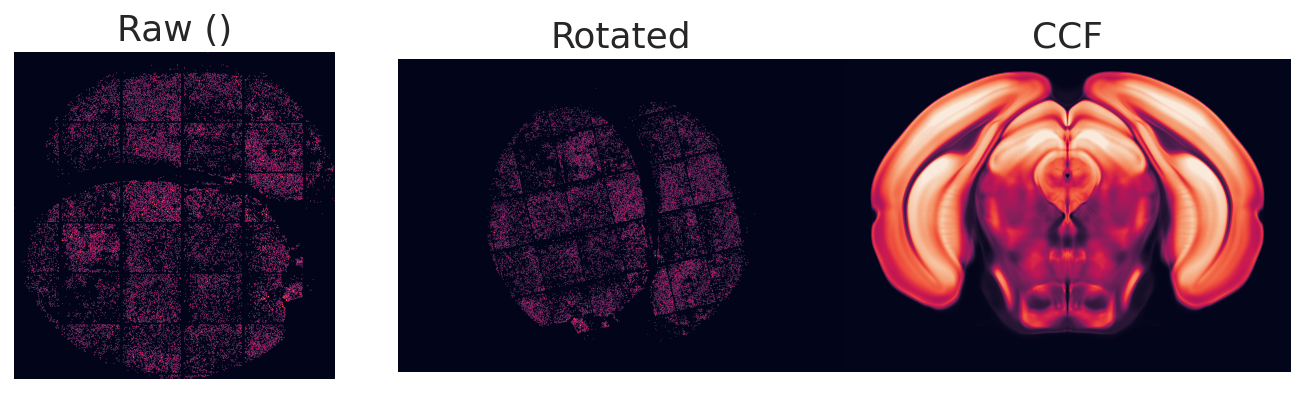

In [5]:
self.config.parameters['registration_idx'] = 916
self.config.parameters['registration_flip'] = True
self.register_preview()

/bigstore/Images2022/gaby/dredFISH/1500uM_DPMF_test_2022May13/Results/registration_1500uM_DPMF_test_2022May13_Section_2910X_2910Y


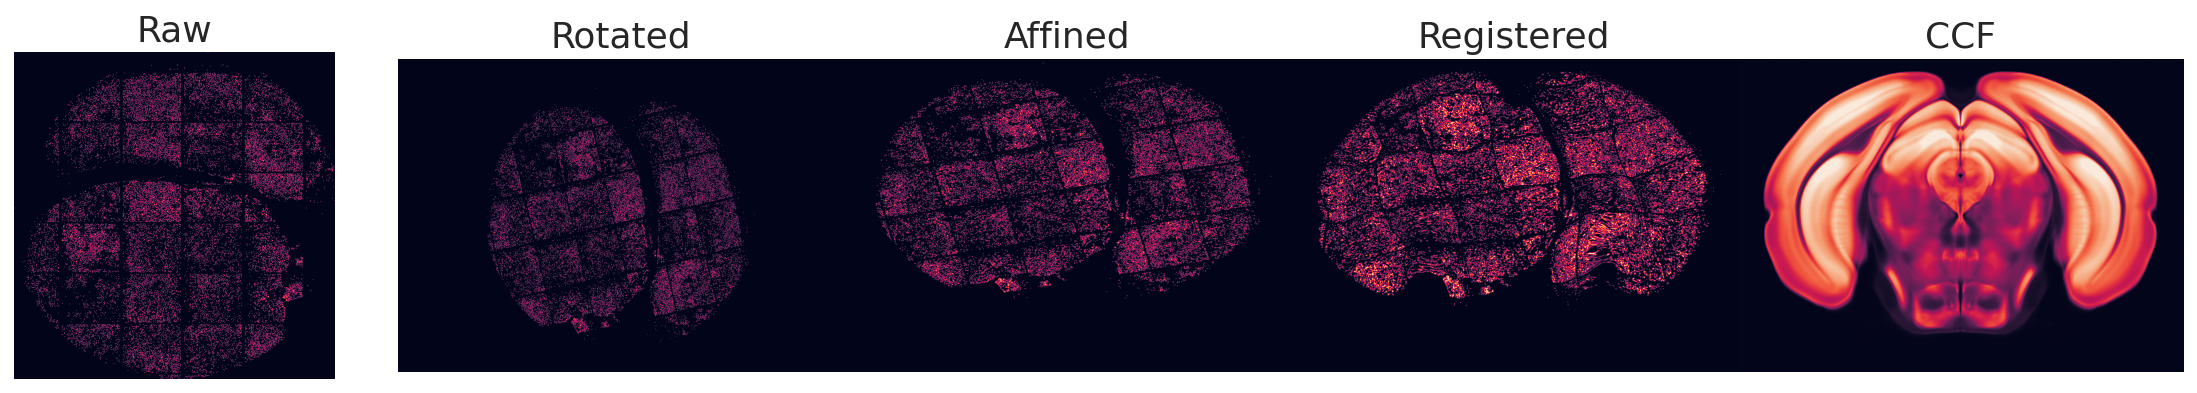

/home/fangming/anaconda3/envs/routine/lib/python3.10/site-packages/anndata/_core/anndata.py:1228: FutureWarning:

The `inplace` parameter in pandas.Categorical.reorder_categories is deprecated and will be removed in a future version. Reordering categories will always return a new Categorical object.

... storing 'region_color' as categorical
/home/fangming/anaconda3/envs/routine/lib/python3.10/site-packages/anndata/_core/anndata.py:1228: FutureWarning:

The `inplace` parameter in pandas.Categorical.reorder_categories is deprecated and will be removed in a future version. Reordering categories will always return a new Categorical object.

... storing 'region_acronym' as categorical


saved to /bigstore/Images2022/gaby/dredFISH/1500uM_DPMF_test_2022May13/Results/registration_1500uM_DPMF_test_2022May13_Section_2910X_2910Yregistered.hdf5


In [8]:
self.config.parameters['registration_force'] = True
self.config.parameters['registration_output_prefix'] = os.path.join(
    self.metadata_path, self.config.parameters['results'], 'registration_'+self.dataset+'_'+self.section
)
print(self.config.parameters['registration_output_prefix'])
    
self.config.parameters['registration_force'] = True
self.register()